sequential model

In [60]:
#sequential class
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [61]:
#점진적으로 sequential model
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [63]:
#model.weights #아직 모델의 build()메서드 호출 전

층은 처음 호출될 때 만들어진다.

층의 가중치 크기가 입력 크기에 따라 달라지기에 입력 크기를 알기 전까지 가중치 만들 수 없다.

가중치 생성 ~ 어떤 데이터 호출 / 입력 크기를 지정하여 build()메서드 호출

In [64]:
model.build(input_shape=(None,3))

In [65]:
model.weights

[<tf.Variable 'dense_29/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.1979217 ,  0.12396201, -0.28074   , -0.29057097,  0.29532248,
         -0.06951208,  0.14986   ,  0.00975868, -0.15474445, -0.17555669,
         -0.08392477, -0.2858868 , -0.23019063,  0.20740825,  0.03164858,
          0.01356936,  0.0661166 ,  0.17736793, -0.07457434,  0.06350398,
          0.20004907,  0.18756783,  0.16351047, -0.13504028,  0.23843312,
          0.18538624,  0.21643573, -0.08065356,  0.19338185, -0.07295774,
          0.26978487,  0.11488768, -0.11971186,  0.13288823,  0.09120563,
         -0.19547455, -0.253691  ,  0.06011522,  0.18214378,  0.14392367,
          0.15660903,  0.02775323,  0.04188928, -0.26961437,  0.06234309,
          0.2561339 , -0.2704672 , -0.02567902, -0.11255328,  0.10101256,
          0.20694894, -0.22796252,  0.29158765,  0.09145755,  0.26757896,
          0.22167069, -0.2570284 , -0.07715483,  0.2562486 ,  0.27174217,
         -0.03295416,  0.00389171,  0.0520

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                256       
                                                                 
 dense_30 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


---

In [67]:
model = keras.Sequential(name='my_example_model')
model.add(layers.Dense(64, activation='relu',name='my_first_layer'))
model.add(layers.Dense(10, activation='relu',name='my_flast_layer'))
model.build((None,3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_flast_layer (Dense)      (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


build()메서드 없이 바로 가중치를 생성하는 방법 = 모델의 입력크기 미리 지정
- input_shape 매개변수

In [68]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64,activation='relu'))

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


functional model

In [70]:
inputs = keras.Input(shape=(3,),name='my_input')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs,outputs=outputs)

In [71]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_32 (Dense)            (None, 64)                256       
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


다중입력,다중출력 모델

3가지 입력
- 이슈 티켓의 제목(텍스트 입력)
- 이슈 티켓의 텍스트 본문
- 사용자가 추가한 태그(범주형 입력으로 여기에서는 원-핫인코딩되었다고 가정)

2가지 출력
- 이슈 티켓의 우선순위 점수로 0과1사이의 스칼라(sigmoid)
- 이슈 티켓을 처리해야 할 부서(전체 부서 집합에 대한 softmax)

In [72]:
#다중입력 다중출력 함수형 모델
vocabulary_size = 10000 #덱스트 입력 크기(0과1로 이루어진 배열로 인코딩가능)
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size),name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

features = layers.Concatenate()([title, text_body, tags])#입력특성을 하나의 텐서 features로 연결
features = layers.Dense(64,activation='relu')(features)#중간층을 적용해 입력 특성을 더 풍부한 표현으로 재결합

priority = layers.Dense(1,activation='sigmoid',name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

model = keras.Model(inputs=[title, text_body, tags],outputs=[priority,department])

모델 훈련하기 by 입력과 타깃 배열을 **리스트**로 전달하는 방식으로

In [73]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0,2,size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='rmsprop',
             loss = ['mean_squared_error', 'categorical_crossentropy'],
             metrics=[['mean_absolute_error'],['accuracy']])
model.fit([title_data, text_body_data, tags_data],
         [priority_data, department_data],
         epochs = 1)
model.evaluate([title_data, text_body_data, tags_data],
         [priority_data, department_data])
priority_preds, department_preds = model.predict([
    title_data, text_body_data, tags_data
])

40/40 [==============================] - 0s 4ms/step


모델 훈련 by 입력과 타깃 배열을 **딕셔너리**로 전달하는 방식으로

In [74]:
model.compile(optimizer='rmsprop',
             loss = {'priority':'mean_squared_error','department':'categorical_crossentropy'},
             metrics={'priority':['mean_absolute_error'],'department':['accuracy']})
model.fit({'title':title_data,
          'text_body':text_body_data,
          'tags':tags_data},
         {'priority':priority_data,
         'department':department_data}, epochs = 1)
model.evaluate({'title':title_data,
          'text_body':text_body_data,
          'tags':tags_data},
         {'priority':priority_data,
         'department':department_data})
priority_preds, department_preds = model.predict({'title':title_data,
          'text_body':text_body_data,
          'tags':tags_data})

40/40 [==============================] - 0s 4ms/step


In [75]:
#함수형 모델을 그래프로 그릴 수 있다.
#keras.utils.plot_model(model,'ticket_classifier.png')

In [76]:
#keras.utils.plot_model(model,'ticket_classifier_with_shape_info.png',show_shapes=True)

함수형 모델의 경우 모든 층의 리스트를 가지고있어 중간 특성을 재사용하는 모델을 또 만들 수 있다

In [77]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

In [78]:
#keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

Model subcalssing

Model 클래스 상속
- "____init____()" 메서드에서 모델이 사용할 층을 정의
- call() 메서드에서 앞서 만든 층을 사용하여 모델의 정방향 패스를 정의
- 서브클래스의 객체를 만들고 데이터와 함께 호출하여 가중치를 만든다.

In [38]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [39]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [40]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


여러방식을 혼합하여 사용하기

In [41]:
#서브클래싱한 모델을 포함하는 함수형 모델
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [42]:
#함수형 모델을 포함하는 서브클래싱 모델
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

---

In [54]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2937 - accuracy: 0.9123 - val_loss: 0.1430 - val_accuracy: 0.9580
Epoch 2/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1605 - accuracy: 0.9544 - val_loss: 0.1142 - val_accuracy: 0.9672
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


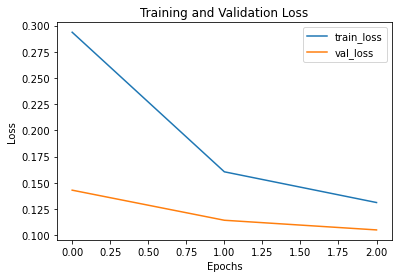

In [55]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

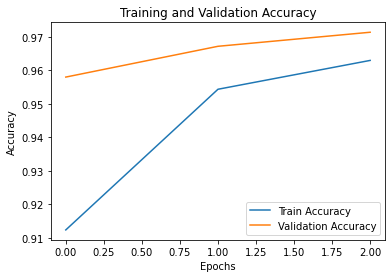

In [56]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

## 사용자 정의 지표

In [45]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")#MSE의 합계를 저장할 변수
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")# 총 샘플 수를 저장할 변수

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])#실제값을 one-hot인코딩
        mse = tf.reduce_sum(tf.square(y_true - y_pred))#오차제곱합계
        self.mse_sum.assign_add(mse)#현재 배치의 mse합계 추가
        num_samples = tf.shape(y_pred)[0] #현재 배치의 샘플 수 계산
        self.total_samples.assign_add(num_samples) # 추가

    def result(self):#현재까지의 mse합계와 총 샘플 수로 RMSE계산
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)#0으로 mse_sum을 초기화
        self.total_samples.assign(0)#total_samples 0으로 초기화

In [46]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
#정의한 평가 지표로 모델 학습하기

Epoch 1/3
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2943 - accuracy: 0.9122 - rmse: 7.1764 - val_loss: 0.1527 - val_accuracy: 0.9551 - val_rmse: 7.3576
Epoch 2/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1591 - accuracy: 0.9529 - rmse: 7.3503 - val_loss: 0.1121 - val_accuracy: 0.9687 - val_rmse: 7.4058
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.1016 - accuracy: 0.9711 - rmse: 7.4340


---

콜백 함수를 통해서 신경망 모델을 훈련할 때, 특정 시점이나 조건에 따라 원하는 작업을 수행하거나 모델의 동작을 제어할 수 있다.

In [47]:
# 모델 훈련 중에 사용할 콜백 함수 목록 정의
callbacks_list = [
    keras.callbacks.EarlyStopping( 
        monitor="val_accuracy",# 검증 정확도 모니터링
        patience=2, # 훈련이 중지되기 전에 성능 향상이 없을 수 있는 에포크 수
    ),
    #모델의 가중치 훈련 저장
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.h5",#가중치 저장 파일 경로
        monitor="val_loss",#검증 손실
        save_best_only=True,#모니터링 지표(검증손실)에 따라 최상의 모델만 저장
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2961 - accuracy: 0.9108 - val_loss: 0.1452 - val_accuracy: 0.9585
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1580 - accuracy: 0.9542 - val_loss: 0.1156 - val_accuracy: 0.9684
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1312 - accuracy: 0.9626 - val_loss: 0.1035 - val_accuracy: 0.9717
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1138 - accuracy: 0.9692 - val_loss: 0.0983 - val_accuracy: 0.9753
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1043 - accuracy: 0.9722 - val_loss: 0.0901 - val_accuracy: 0.9766
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0937 - accuracy: 0.9740 - val_loss: 0.0914 - val_accuracy: 0.9785
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0856 - accuracy: 0.9763 - val_loss: 0.0886 - val_ac

In [48]:
model = keras.models.load_model("checkpoint_path.h5")

### 사용자 정의 콜백

해당 콜백은 각 배치와 에포크의 손실 값을 추적하고 그래프로 시각화하여 저장하는 기능을 가진 코드

In [49]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []#각 배치의 손실 값을 저장할 리스트

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))#각 배치의 손실값을 리스트에 추가

    def on_epoch_end(self, epoch, logs):
        plt.clf()#그래프 초기화
        # 각 배치의 손실 값에 대한 그래프 그리기
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2927 - accuracy: 0.9125 - val_loss: 0.1447 - val_accuracy: 0.9596
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1564 - accuracy: 0.9548 - val_loss: 0.1111 - val_accuracy: 0.9691
Epoch 3/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1290 - accuracy: 0.9629 - val_loss: 0.1044 - val_accuracy: 0.9708
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1127 - accuracy: 0.9686 - val_loss: 0.0946 - val_accuracy: 0.9753
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1044 - accuracy: 0.9720 - val_loss: 0.1008 - val_accuracy: 0.9745
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0958 - accuracy: 0.9741 - val_loss: 0.0927 - val_accuracy: 0.9773
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0857 - accuracy: 0.9766 - val_loss: 0.0953 - val_ac

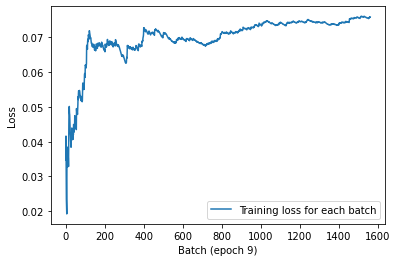

In [50]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

## 회고

직접 짜보고 층을 쌓아볼 수 있어서 딥러닝 모델의 아키텍처에 대해서 흐름과 함께 이해할 수 있었습니다. 또한 클래스를 직접 짜보면서 사용자가 원하는 코드를 구성하는 방법을 익힐 수 있었습니다.